# Softmax classification in Keras

In [1]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


# Preparing data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 # Normalize

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

**One-hot/categorical encoding the labels**

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [4]:
print(train_images_original.shape)
print(train_images.shape)
print(train_labels_original.shape)
print(train_labels.shape)
print(train_labels[0])
print(train_labels_original[0])

(60000, 28, 28)
(60000, 784)
(60000,)
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


# Model

In [5]:
from keras import models
from keras import layers
from keras import optimizers

classifier = models.Sequential()
classifier.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**Compile the model with SGD and categorical cross entropy**

In [0]:
sgd = optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
classifier.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [7]:
epochs = 30
history = classifier.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.5771 - acc: 0.8543 - val_loss: 0.3792 - val_acc: 0.8989
Epoch 2/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.3754 - acc: 0.8966 - val_loss: 0.3352 - val_acc: 0.9087
Epoch 3/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.3432 - acc: 0.9042 - val_loss: 0.3171 - val_acc: 0.9112
Epoch 4/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.3267 - acc: 0.9083 - val_loss: 0.3054 - val_acc: 0.9150
Epoch 5/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.3160 - acc: 0.9115 - val_loss: 0.2986 - val_acc: 0.9160
Epoch 6/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.3082 - acc: 0.9134 - val_loss: 0.2944 - val_acc: 0.9177
Epoch 7/30
60000/60000 [==============================] - 1s 17us/step - loss: 0

# Display the training/test loss/accuracy

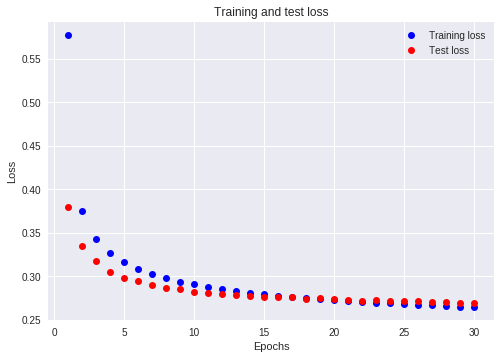

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

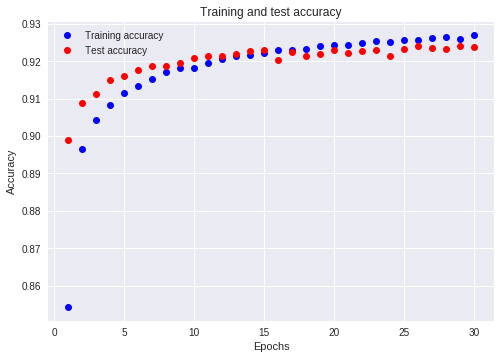

In [9]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()